<h2>Demonstrating Frequency Distribution Plots in AWOT</h2>

In [1]:
import awot
import os
import matplotlib.pyplot as plt
%matplotlib inline

<b>Set the files and start/end time segments</b>

In [2]:
p3f = os.path.join("/Users/guy/data/dynamo/", "111124I", "0705_windsyn.nc")
wcrf = os.path.join("/Users/guy/data/king_air/owles2013/wcr", "WCR.OWLES13.20140127.203210_210457.up-down.nc")
nexf = os.path.join("/Users/guy/data/nexrad/KILN/nex2/20140429", "KILN20140430_022654_V06")
    
p3s, p3e = "2011-11-24 07:05:00", "2011-11-24 07:45:00"
ws, we = "2014-01-27 20:35:00", "2014-01-27 20:40:00"

<b> Read in the file</b>

In [3]:
p3 = awot.io.read_windsyn_tdr_netcdf(fname=p3f, field_mapping=None)
wcr = awot.io.read_wcr2(fname=wcrf)
nex = awot.io.read_ground_radar(nexf)

time_diff does not exist in file...
height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...


<b>Create RadarUtilityPlot class from radar instances</b>

In [23]:
p3ut = awot.graph.RadarUtilityPlot(p3)
wcrut = awot.graph.RadarUtilityPlot(wcr)
nexut = awot.graph.RadarUtilityPlot(nex)

In [24]:
print("WCR\n"
      "Min/Max Refelectivity: %f/%f\n"
      "Min/Max Velocity: %f/%f\n"
      "Min/Max Height: %f/%f\n"
      "\n"
      "P-3\n"
      "Min/Max Refelectivity: %f/%f\n"
      "Min/Max Velocity: %f/%f\n"
      "Min/Max Height: %f/%f\n"
      "\n"
      "NEXRAD\n"
      "Min/Max Refelectivity: %f/%f\n"
      "Min/Max Velocity: %f/%f\n"
      "Min/Max Height: %f/%f\n"
      %(wcrut.fields['reflectivity']['data'].min(),wcrut.fields['reflectivity']['data'].max(),
        wcrut.fields['velocity']['data'].min(),wcrut.fields['velocity']['data'].max(),
        wcrut.height['data'].min(),wcrut.height['data'].max(),
        p3ut.fields['reflectivity']['data'].min(),p3ut.fields['reflectivity']['data'].max(),
        p3ut.fields['Wwind']['data'].min(),p3ut.fields['Wwind']['data'].max(),
        p3ut.height['data'].min(),p3ut.height['data'].max(),
        nexut.fields['reflectivity']['data'].min(),nexut.fields['reflectivity']['data'].max(),
        nexut.fields['velocity']['data'].min(),nexut.fields['velocity']['data'].max(),
        nexut.height['data'].min(),nexut.height['data'].max(),
       )
     )

WCR
Min/Max Refelectivity: -54.610954/46.513153
Min/Max Velocity: -15.402483/15.429156
Min/Max Height: 66.791504/2905.298340

P-3
Min/Max Refelectivity: -10.459630/56.000000
Min/Max Velocity: -7.429778/9.103548
Min/Max Height: 500.000000/15000.000000

NEXRAD
Min/Max Refelectivity: -16.000000/89.000000
Min/Max Velocity: -35.500000/35.500000
Min/Max Height: 15.036217/164698.885434



<h3>Plot CFAD (Contoured Frequency by Altitude Diagram) distributions of Radar Reflectivity and Doppler Velocity.</h3>
<br>
<i> Note: This only works with gridded data.

<b>First we'll make a plot with a linear luminance (colormap)</b>

/Users/guy/anaconda/lib/python2.7/site-packages/awot-0.2.8-py2.7.egg/awot/graph/radar_utility.py:396: RuntimeWarning: invalid value encountered in divide
/Users/guy/anaconda/lib/python2.7/site-packages/awot-0.2.8-py2.7.egg/awot/graph/radar_utility.py:412: RuntimeWarning: invalid value encountered in less
/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


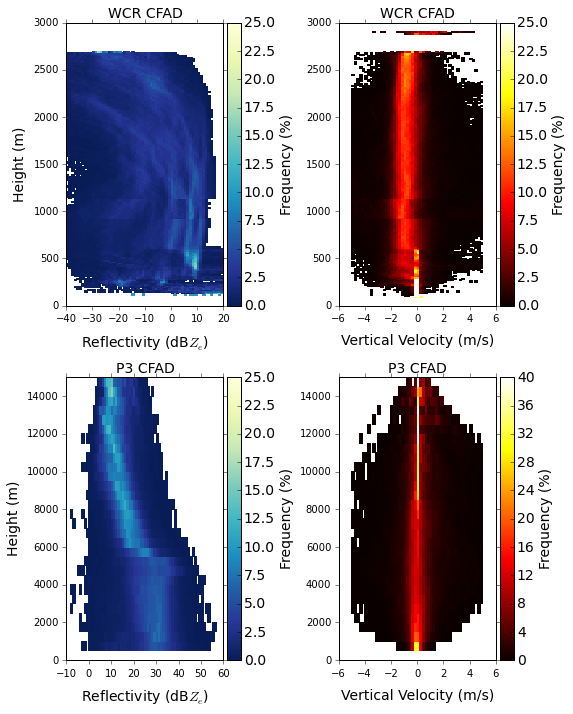

In [14]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

cfadwcrZ = wcrut.plot_cfad('reflectivity', height_axis=1, discrete_levels=False,
                           xbinsminmax=(-40., 20.), nbinsx=61, plot_percent=True, plot_colorbar=True,
                           vmin=0., vmax=25, y_min=0., y_max = 3000.,
                           xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           mask_below=.01, ax=ax1Z)
cfadwcrW = wcrut.plot_cfad('velocity', height_axis=1, discrete_levels=False,
                           xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                           vmin=0., vmax=25., y_min=0., y_max = 3000.,
                           xlab= "Vertical Velocity (m/s)", xpad=10, 
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           mask_below=.01, ax=ax1W)
cfadp3Z = p3ut.plot_cfad('reflectivity', height_axis=0, discrete_levels=False,
                         xbinsminmax=(-10., 60.), nbinsx=71, plot_percent=True, plot_colorbar=True,
                         vmin=0., vmax=25, y_min=0., y_max = 15000.,
                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                         mask_below=.001, ax=ax2Z)
cfadp3W = p3ut.plot_cfad('Wwind', height_axis=0, discrete_levels=False,
                         xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                         vmin=0., vmax=40, y_min=0., y_max = 15000.,
                         xlab= "Vertical Velocity (m/s)", xpad=10, 
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                         mask_below=.01, ax=ax2W)
figC.tight_layout()

<b>Next we'll make a plot with discrete levels of plotting</b>

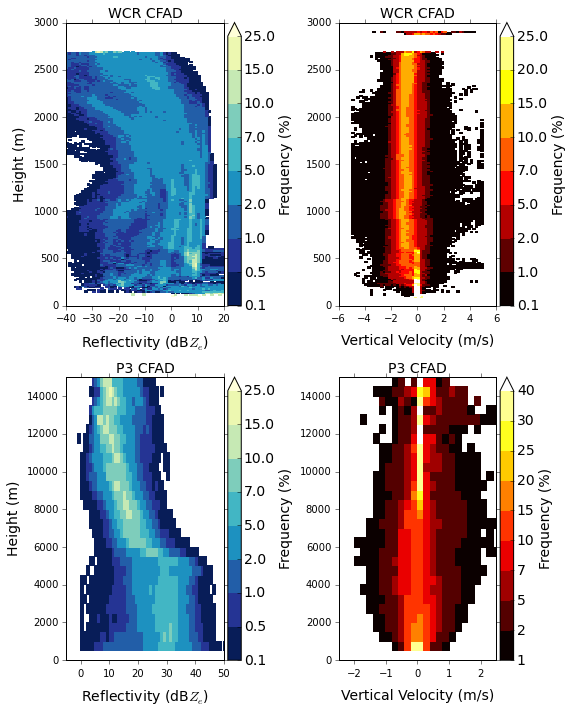

In [15]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

levsWwcr = [.1, 1, 2, 5, 7, 10, 15, 20, 25]
levsWp3 = [1, 2, 5, 7, 10, 15, 20, 25, 30, 40]
cfadwcrZ = wcrut.plot_cfad('reflectivity', height_axis=1, plot_percent=True,
                           xbinsminmax=(-40., 20.), nbinsx=61, plot_colorbar=True,
                           vmin=0.1, vmax=25., y_min=0., y_max = 3000.,
                           xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           mask_below=.01, ax=ax1Z)
cfadwcrW = wcrut.plot_cfad('velocity', height_axis=1,
                           xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                           levels=levsWwcr, y_min=0., y_max = 3000.,
                           xlab= "Vertical Velocity (m/s)", xpad=10, 
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           mask_below=.01, ax=ax1W)
cfadp3Z = p3ut.plot_cfad('reflectivity', height_axis=0, mask_below=.001, #discrete_levels=False,
                         xbinsminmax=(-10., 60.), nbinsx=71, plot_percent=True, plot_colorbar=True,
                         vmin=None, vmax=None,
                         x_min=-5., x_max=50., y_min=0., y_max = 15000.,
                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                         ax=ax2Z)
cfadp3W = p3ut.plot_cfad('Wwind', height_axis=0,
                         xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                         levels=levsWp3, x_min=-2.5, x_max=2.5, y_min=0., y_max = 15000.,
                         xlab= "Vertical Velocity (m/s)", xpad=10, 
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                         mask_below=.01, ax=ax2W)
figC.tight_layout()

<b>Let's plot some quantiles of the reflectivity data</b>

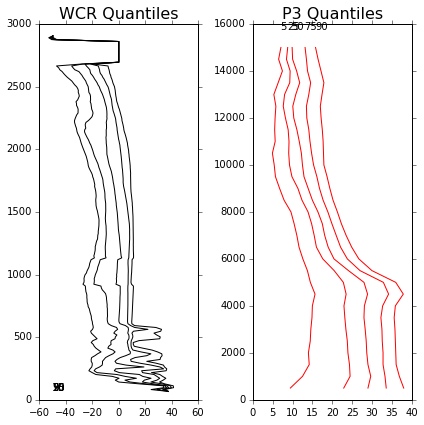

In [16]:
figC, (axq1, axq2) = plt.subplots(1, 2, figsize=(6,6))

quantwcr = wcrut.plot_quantiles('reflectivity', quantiles=[10, 25, 50, 75, 90],
                                height_axis=1, start_time=None, end_time=None,
                                qcolor='k', qlabels_on=True,
#                                mask_above_height=2750., mask_below_height=250.,
                                x_min=None, x_max=None, y_min=None, y_max=None,
                                xlab=None, xlabFontSize=None, xpad=None,
                                ylab=None, ylabFontSize=None, ypad=None,
                                title="WCR Quantiles", titleFontSize=None,
                                setup_axes=True, ax=axq1)

quantp3 = p3ut.plot_quantiles('reflectivity', quantiles=[5, 25, 50, 75, 90],
                              height_axis=0, start_time=None, end_time=None,
                              qcolor='r', qlabels_on=True,
                              mask_between_height=(6000., 8000.),mask_below_height=2500.,
                              x_min=None, x_max=None,
                              y_min=None, y_max=None,
                              xlab=None, xlabFontSize=None, xpad=None,
                              ylab=None, ylabFontSize=None, ypad=None,
                              title="P3 Quantiles", titleFontSize=None,
                              setup_axes=True, ax=axq2)
figC.tight_layout()

<b>We can also overlay the quantiles on top of the CFADs</b>

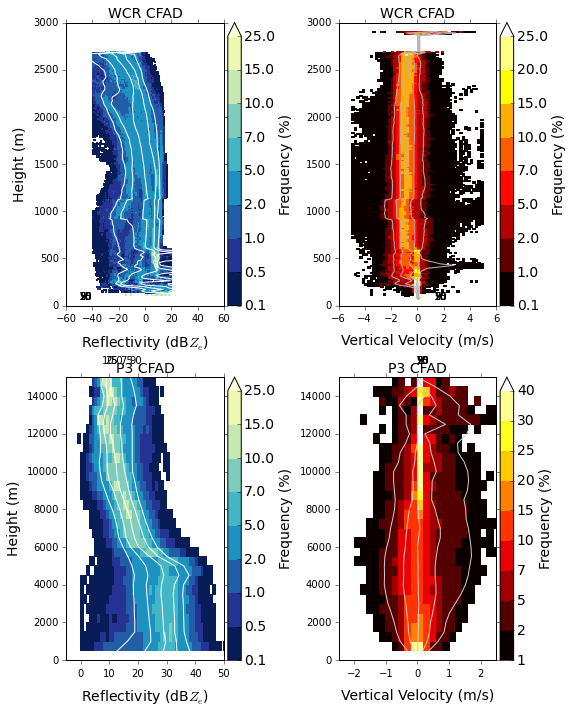

In [22]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

levsWwcr = [.1, 1, 2, 5, 7, 10, 15, 20, 25]
levsWp3 = [1, 2, 5, 7, 10, 15, 20, 25, 30, 40]
cfadwcrZ = wcrut.plot_cfad('reflectivity', height_axis=1, plot_percent=True,
                           xbinsminmax=(-40., 20.), nbinsx=61, plot_colorbar=True,
                           vmin=0.1, vmax=25., y_min=0., y_max = 3000.,
                           xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           quantiles=[10, 25, 50, 75, 90], qcolor='w',
                           mask_below=.01, ax=ax1Z)
cfadwcrW = wcrut.plot_cfad('velocity', height_axis=1,
                           xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                           levels=levsWwcr, y_min=0., y_max = 3000.,
                           xlab= "Vertical Velocity (m/s)", xpad=10, 
                           xlabFontSize=14, ylabFontSize=14,
                           title="WCR CFAD", titleFontSize=14,
                           cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           quantiles=[10, 25, 50, 75, 90], qcolor='0.7',
                           mask_below=.01, ax=ax1W)
cfadp3Z = p3ut.plot_cfad('reflectivity', height_axis=0, mask_below=.001, #discrete_levels=False,
                         xbinsminmax=(-10., 60.), nbinsx=71, plot_percent=True, plot_colorbar=True,
                         vmin=None, vmax=None,
                         x_min=-5., x_max=50., y_min=0., y_max = 15000.,
                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                           quantiles=[10, 25, 50, 75, 90], qcolor='w',
                         ax=ax2Z)
cfadp3W = p3ut.plot_cfad('Wwind', height_axis=0,
                         xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                         levels=levsWp3, x_min=-2.5, x_max=2.5, y_min=0., y_max = 15000.,
                         xlab= "Vertical Velocity (m/s)", xpad=10, 
                         xlabFontSize=14, ylabFontSize=14,
                         title="P3 CFAD", titleFontSize=14,
                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                           quantiles=[10, 25, 50, 75, 90], qcolor='0.8',
                         mask_below=.01, ax=ax2W)
figC.tight_layout()

<b>Create bivariate freqency distributions of Reflectivity-Height. Similar to CFAD. This needs a bit more work and would benefit from the discrete colorbar as well I bet.</b>

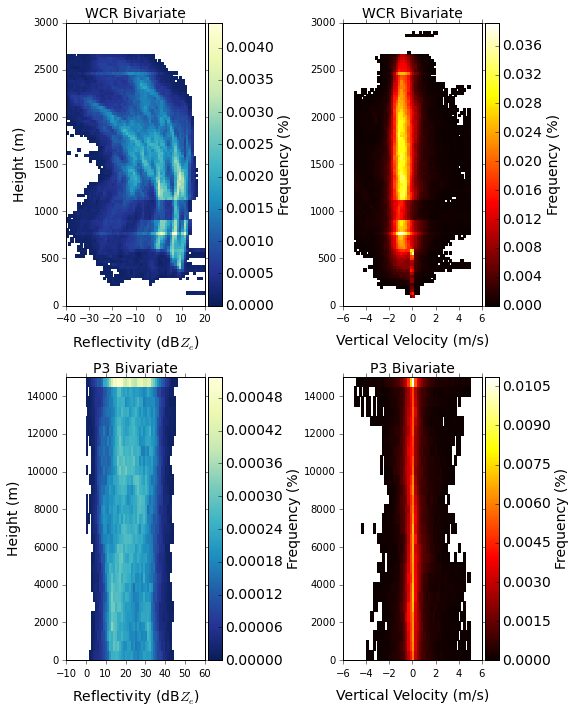

In [26]:
figC, ((ax1Z, ax1W), (ax2Z, ax2W)) = plt.subplots(2, 2, figsize=(8,10))

bivwcrZ = wcrut.plot_bivariate_frequency('reflectivity', 'height',
                                         xbinsminmax=(-40., 20.), nbinsx=61,
                                         ybinsminmax=(0., 3000.), nbinsy=100,
                                         plot_percent=True, plot_colorbar=True,
                                         vmin=0., vmax=None, y_min=0., y_max = 3000.,
                                         xlab= "Reflectivity (dB${Z}$$_{e}$)", ylab="Height (m)", xpad=10,
                                         xlabFontSize=14, ylabFontSize=14,
                                         title="WCR Bivariate", titleFontSize=14,
                                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                                         mask_below=.0001, ax=ax1Z)
bivwcrW = wcrut.plot_bivariate_frequency('velocity', 'height',
                                         xbinsminmax=(-5., 5.), nbinsx=51,
                                         ybinsminmax=(0., 3000.), nbinsy=100,
                                         plot_percent=True, plot_colorbar=True,
                                         vmin=0., vmax=None, y_min=0., y_max = 3000.,
                                         xlab= "Vertical Velocity (m/s)", xpad=10, xlabFontSize=14,
                                         title="WCR Bivariate", titleFontSize=14,
                                         cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                                         mask_below=.0001, ax=ax1W)
bivp3Z = p3ut.plot_bivariate_frequency('reflectivity', 'height',# mask_below=.001, 
                                       xbinsminmax=(-10., 60.), nbinsx=71,
                                       ybinsminmax=(0., 15000.), nbinsy=30,
                                       plot_percent=True, plot_colorbar=True,
                                       vmin=0., vmax=None, y_min=0., y_max = 15000.,
                                       xlab= "Reflectivity (dB${Z}$$_{e}$)", 
                                       ylab="Height (m)", xpad=10,
                                       xlabFontSize=14, ylabFontSize=14,
                                       title="P3 Bivariate", titleFontSize=14,
                                       cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='YlGnBu_r',
                                       mask_below=.00001, ax=ax2Z)
bivp3W = p3ut.plot_bivariate_frequency('Wwind', 'height',
                                       xbinsminmax=(-5., 5.), nbinsx=51,
                                       ybinsminmax=(0., 15000.), nbinsy=30,
                                       plot_percent=True, plot_colorbar=True,
                                       vmin=0., vmax=None, y_min=0., y_max = 15000.,
                                       xlab= "Vertical Velocity (m/s)", xpad=10, xlabFontSize=14,
                                       title="P3 Bivariate", titleFontSize=14,
                                       cb_fontsize=14, cb_ticklabel_size=14, cb_pad=.02, cmap='hot',
                                       mask_below=.00005, ax=ax2W)
figC.tight_layout()